# **고객 데이터의 전체 모습을 파악**

## **고객의 소리(VOC)**  
- 제가 운영하는 스포츠센터 트레이닝 붐 때문에 지금까지 고객 수가 늘었다.  
- 최근 1년간 고객 수가 늘지 않은것 같다.  
- 자주 이용하는 고객만 계속 오는 느낌.  
- 회원 데이터를 분석한 적이 없어 어떤 고객이 계속 이용하고 있는지조차 모름.  
- 데이터 분석을 하면 뭔가 알 수 있을까?

## **전제조건**  
- 스포츠 센터는 언제든 이용할 수 있는 종일 회원, 낮에만 사용할 수 있는 주간 회원, 밤에만 사용할 수 있는 야간 회원  
- 비정기적 입회비 할인, 반액, 무료 행사, 신규 회원을 유치  
- 탈퇴 월말까지 신청 그 다음달 말에 탈퇴가 됩니다.

## **사용할 데이터**  
- use_log.csv : 센터 이용 이력 2018년 4월부터 2019년 3월까지 1년분  
- class_master.csv : 회원 구분 (종일, 주간, 야간)  
- campaign_master.csv : 행사 종류 데이터 (입회비 유무)  
- customer_master.csv : 2019년 3월 말 시점 회원 데이터

## **데이터 읽어오기**

In [4]:
import pandas as pd

In [5]:
uselog = pd.read_csv('use_log.csv')
uselog.shape

(197428, 3)

In [6]:
uselog.head(3)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01


In [7]:
customer = pd.read_csv('customer_master.csv')
customer.shape

(4192, 8)

In [8]:
customer.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


In [9]:
class_master = pd.read_csv('class_master.csv')
class_master.shape

(3, 3)

In [10]:
class_master

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [11]:
campaign_master = pd.read_csv('campaign_master.csv')
campaign_master.shape

(3, 2)

In [12]:
campaign_master

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


## **고객 데이터 가공**

In [13]:
customer_join = pd.merge(customer, class_master, on = 'class', how = 'left')

In [14]:
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')

In [15]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [16]:
customer_join.shape

(4192, 11)

In [17]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
customer_id      4192 non-null object
name             4192 non-null object
class            4192 non-null object
gender           4192 non-null object
start_date       4192 non-null object
end_date         1350 non-null object
campaign_id      4192 non-null object
is_deleted       4192 non-null int64
class_name       4192 non-null object
price            4192 non-null int64
campaign_name    4192 non-null object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [18]:
customer_join.isnull().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
dtype: float64

In [19]:
customer_join.isna().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
dtype: float64

## **고객 데이터 집계**

In [20]:
customer_join.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [21]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [22]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [23]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [24]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [25]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [26]:
customer_start = customer_join.loc[customer_join['start_date'] >= pd.to_datetime('20180401')]

In [27]:
print(len(customer_start))

1376


## **최근 고객 데이터**

In [28]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | 
                                  (customer_join['end_date'].isna())]

In [29]:
print(len(customer_newer))

2953


In [30]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [31]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [32]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

## **이용 이력 데이터 집계**  
- 월 이용 횟수  
- 평균 이용 횟수  
- 중앙 이용 횟수  
- 최소, 최대 이용 횟수  

In [33]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
log_id         197428 non-null object
customer_id    197428 non-null object
usedate        197428 non-null object
dtypes: object(3)
memory usage: 4.5+ MB


In [34]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])

In [35]:
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')

In [36]:
uselog.head(3)

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804


In [37]:
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index = False).count()
uselog_months.head(3)

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3


In [38]:
uselog_months.rename(columns = {'log_id' : 'count'}, inplace = True)

In [39]:
del uselog_months['usedate']

In [40]:
uselog_months.head(3)

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3


In [41]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']

In [42]:
uselog_customer = uselog_customer.reset_index(drop = False)

In [43]:
uselog_customer.head(3)

,customer_id,mean,median,max,min
0,AS002855,4.5,5.0,7,2
1,AS008805,4.0,4.0,8,1
2,AS009013,2.0,2.0,2,2


## **이용 이력 데이터로부터 정기 이용 여부 컬럼**  
- 매주 같은 요일에 오는 고객  
- 최대값 4이상인 요일이 있으면 1처리
- 고객마다 월/요일별로 집계

In [44]:
uselog['weekday'] = uselog['usedate'].dt.weekday

In [45]:
uselog.head(3)

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6


In [46]:
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'], as_index = False)\
.count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.head(3)

,customer_id,연월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4


In [47]:
uselog_weekday.rename(columns = {'log_id' : 'count'}, inplace = True)

In [48]:
uselog_weekday.head(3)

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4


In [49]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index = False).max()[['customer_id', 'count']]
uselog_weekday['routine_fig'] = 0
uselog_weekday['routine_fig'] = uselog_weekday['routine_fig'].where(uselog_weekday['count'] < 4, 1)
uselog_weekday.head(3)

,customer_id,count,routine_fig
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0


## **고객 데이터와 이용 이력 데이터 결합**

In [50]:
customer_join = pd.merge(customer_join, uselog_customer, on = 'customer_id', how = 'left')

In [51]:
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_fig']], on = 'customer_id', how = 'left')

In [52]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_fig
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [53]:
customer_join.isnull().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
mean             0.000000
median           0.000000
max              0.000000
min              0.000000
routine_fig      0.000000
dtype: float64

In [54]:
customer_join.shape

(4192, 16)

## **회원 기간을 계산**  
- 기간 : end_date - start_date  
- 탈퇴하지않은 회원은 end_date 결측 값이기 때문에 값 수정이 필요함.

In [55]:
!conda list relativedelta

# packages in environment at C:\Users\admin\Anaconda3:
#
# Name                    Version                   Build  Channel


In [56]:
!conda list python-dateutil

# packages in environment at C:\Users\admin\Anaconda3:
#
# Name                    Version                   Build  Channel
python-dateutil           2.8.0                    py37_0  


In [57]:
from dateutil.relativedelta import relativedelta

In [58]:
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_fig,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30


In [61]:
customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0]

(Timestamp('2019-04-30 00:00:00'), Timestamp('2015-05-01 00:00:00'))

In [62]:
delta = relativedelta(customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0])

In [65]:
delta.years, delta.months

(3, 11)

In [64]:
delta.years * 12 + delta.months

47

In [68]:
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years * 12 + delta.months

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_fig,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47


## **고객 행동의 각종 통계량 파악**

In [70]:
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [71]:
customer_join.groupby('routine_fig').count()['customer_id']

routine_fig
0     779
1    3413
Name: customer_id, dtype: int64

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

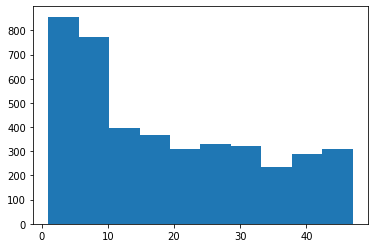

In [73]:
plt.hist(customer_join['membership_period'])

## **탈퇴회원과 지속회원의 차이 파악**
- 고객의 매월 평균 이용 횟수

In [74]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_fig,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [75]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_fig,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
